# Resource Allocation Optimization in 5G Networks: A Machine Learning Approach

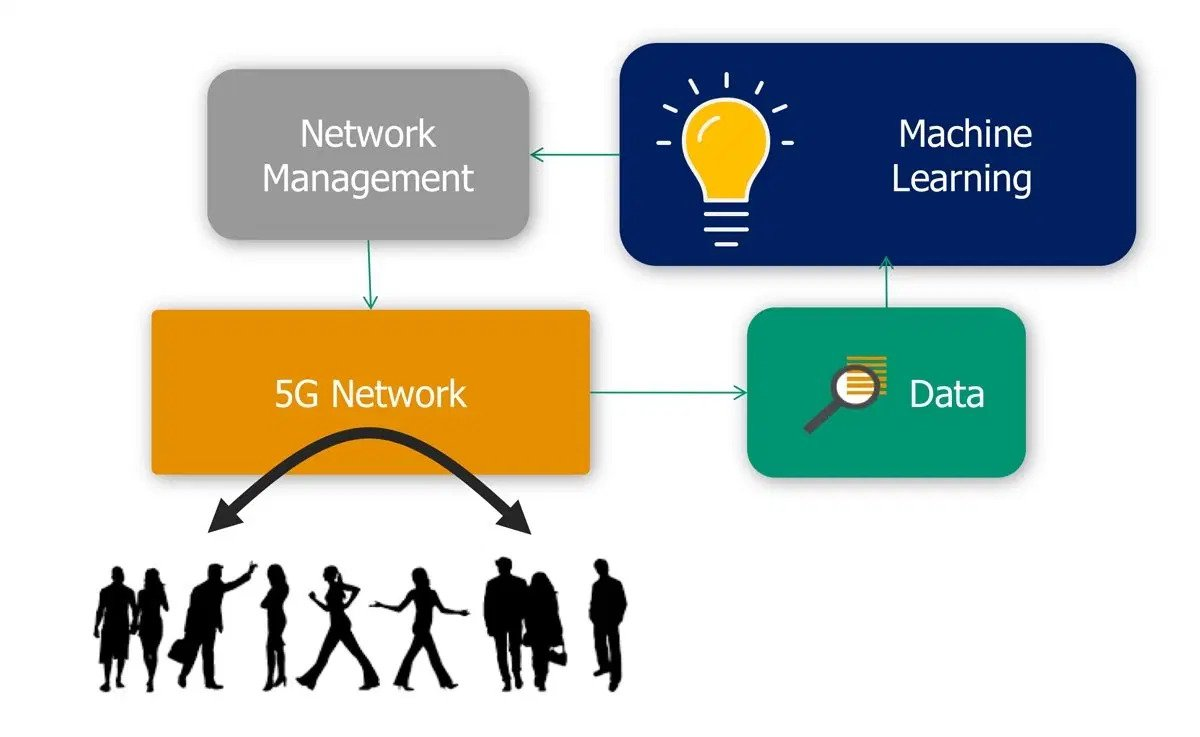

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # is a high-level interface for creating various types of interactive plots with minimal code. 
import plotly.graph_objects as go # is a lower-level interface that offers more control and customization over the appearance and behavior of your plots

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("5G_Service.csv")

In [4]:
df.head()

Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  09-03-2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  09-03-2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  09-03-2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  09-03-2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  09-03-2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%

In [5]:
df.tail()

Timestamp   User_ID   Application_Type Signal_Strength Latency  \
395  09-03-2023 10:06  User_396          Streaming        -110 dBm   61 ms   
396  09-03-2023 10:06  User_397         Video_Call         -40 dBm   53 ms   
397  09-03-2023 10:06  User_398    Video_Streaming        -113 dBm   58 ms   
398  09-03-2023 10:06  User_399  Emergency_Service         -40 dBm    5 ms   
399  09-03-2023 10:06  User_400       Web_Browsing        -113 dBm    0 ms   

    Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
395           1.3 Mbps            1.8 Mbps                 85%  
396          14.5 Mbps           15.8 Mbps                 75%  
397           1.0 Mbps            1.4 Mbps                 70%  
398           0.4 Mbps            0.4 Mbps                 70%  
399           0.1 Mbps            0.1 Mbps                 70%

In [6]:
df.shape

(400, 8)

In [7]:
df.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [11]:
df.nunique()

Timestamp                7
User_ID                400
Application_Type        11
Signal_Strength         84
Latency                 87
Required_Bandwidth     188
Allocated_Bandwidth    194
Resource_Allocation      9
dtype: int64

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(float) / 100

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    object        
 2   Application_Type     400 non-null    object        
 3   Signal_Strength      400 non-null    float64       
 4   Latency              400 non-null    float64       
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 25.1+ KB


In [16]:
df.describe()

Signal_Strength     Latency  Required_Bandwidth  Allocated_Bandwidth  \
count       400.000000  400.000000          400.000000           400.000000   
mean        -80.495000   33.825000            3.135512             3.502380   
std          20.701119   21.122139            3.984097             4.460801   
min        -123.000000    0.000000            0.000000             0.000000   
25%         -98.000000   21.750000            0.417500             0.417500   
50%         -83.000000   31.000000            1.200000             1.350000   
75%         -64.000000   45.000000            4.100000             4.425000   
max         -40.000000  110.000000           14.500000            15.800000   

       Resource_Allocation  
count           400.000000  
mean              0.747125  
std               0.089823  
min               0.500000  
25%               0.700000  
50%               0.700000  
75%               0.800000  
max               0.900000

In [17]:
object_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Object columns:", object_columns)
print("Numerical columns:", numerical_columns)

Object columns: ['User_ID', 'Application_Type']
Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


In [18]:
df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [19]:
df['Application_Type'].value_counts()

Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: Application_Type, dtype: int64

Countplot for: Application Type


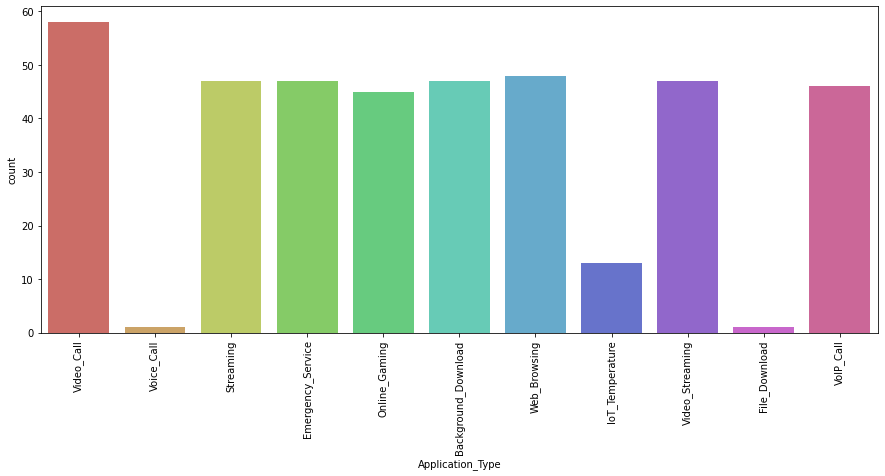

In [20]:
print('Countplot for:', 'Application Type')
plt.figure(figsize=(15,6))
sns.countplot(df['Application_Type'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()
print('\n')

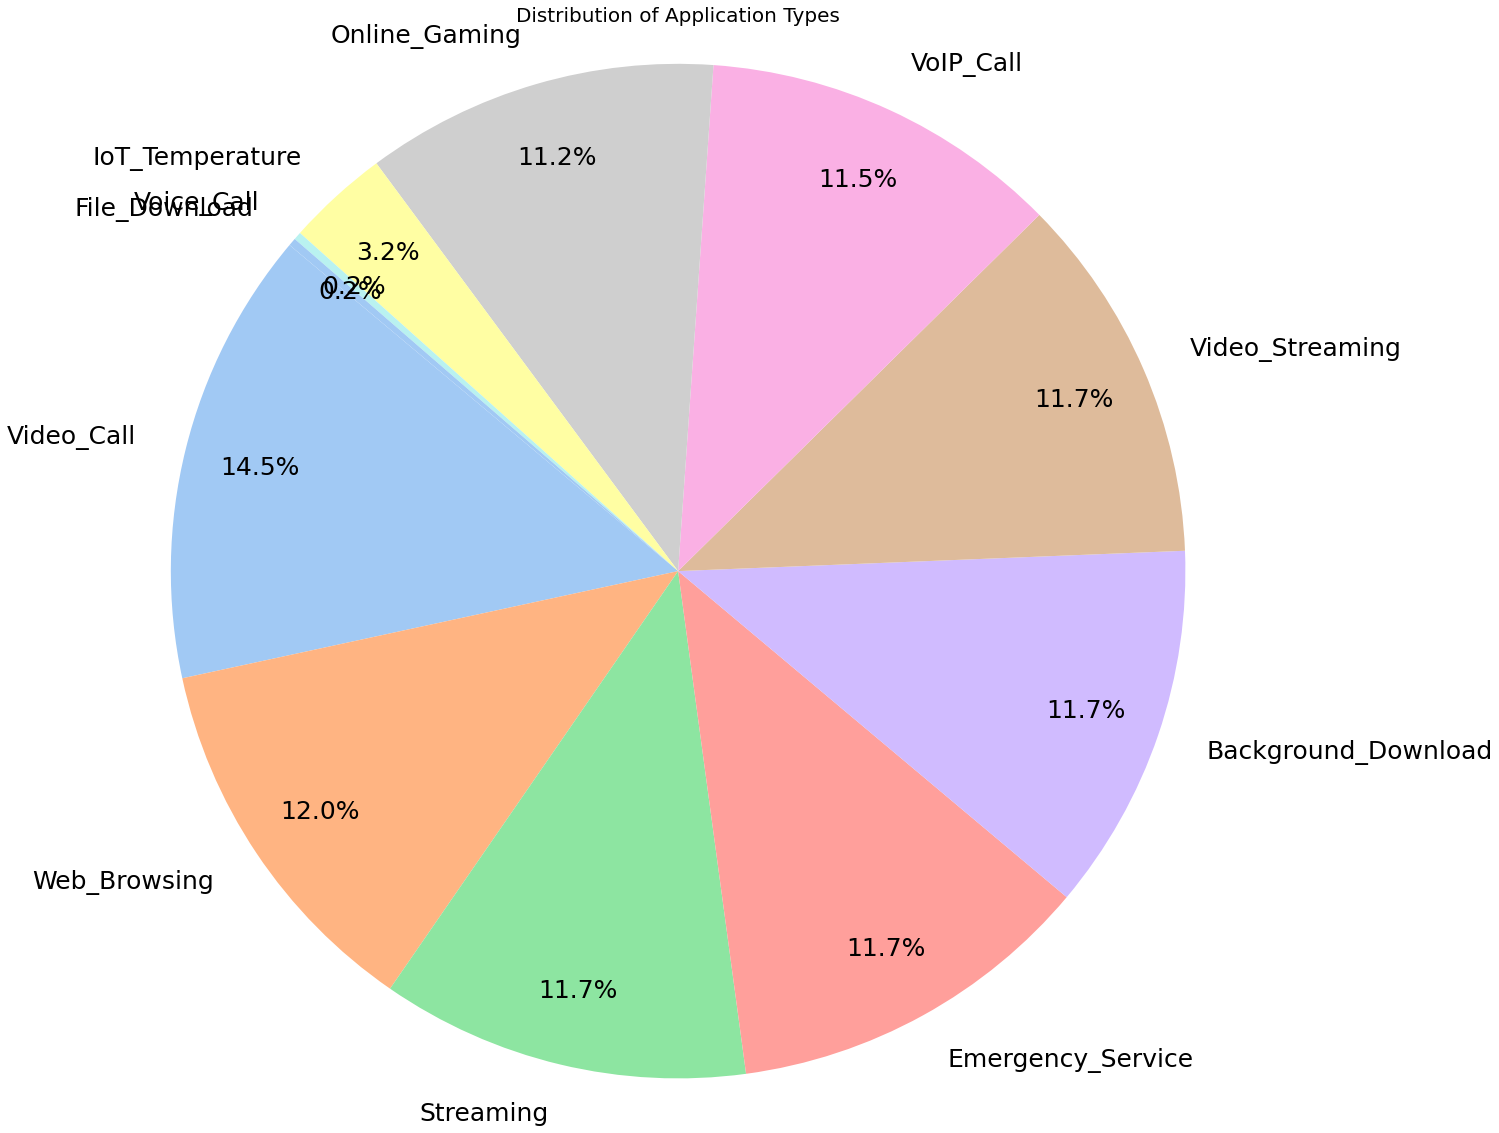

In [21]:
plt.figure(figsize=(20, 20))
application_type_counts = df['Application_Type'].value_counts()
colors = sns.color_palette('pastel')[0:len(application_type_counts)]
plt.pie(application_type_counts, labels=application_type_counts.index, colors=colors, autopct=lambda p:f'{p:.1f}%', startangle=140, pctdistance=0.85, textprops={'fontsize': 25})
plt.title("Distribution of Application Types", fontsize=20)
plt.axis('equal')  
plt.show()

In [22]:
fig = go.Figure(data=[go.Bar(x=df['Application_Type'].value_counts().index, y=df['Application_Type'].value_counts())])
fig.update_layout(title='Application Type', xaxis_title='Application Type',
                  yaxis_title="Count")
fig.show()

In [23]:
fig = px.pie(df, names= 'Application_Type', title='Distribution of ' + 'Application_Type')
fig.show()

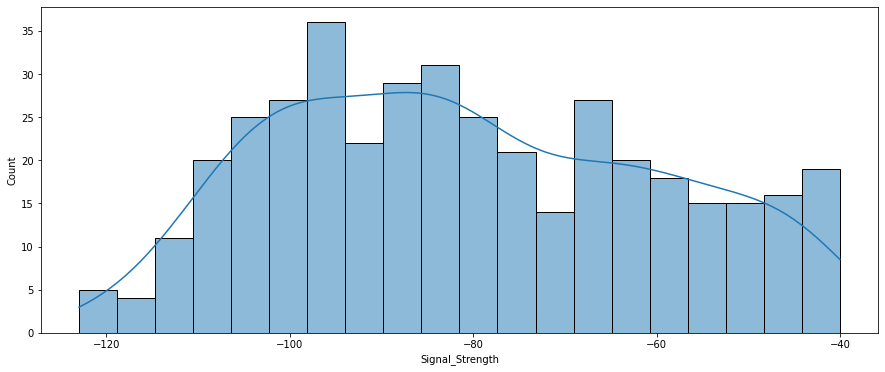

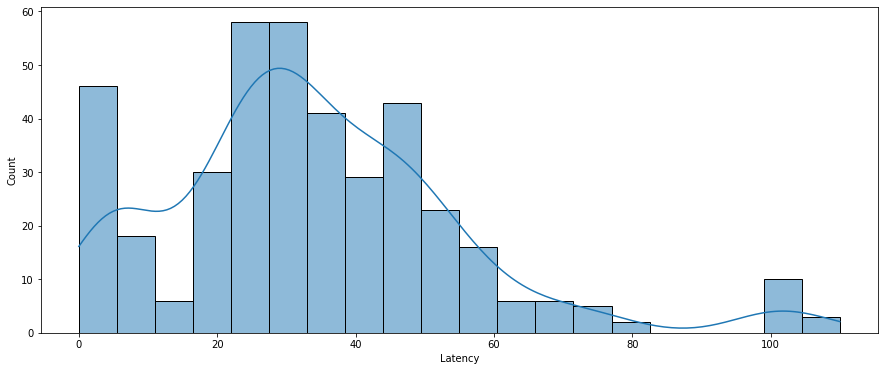

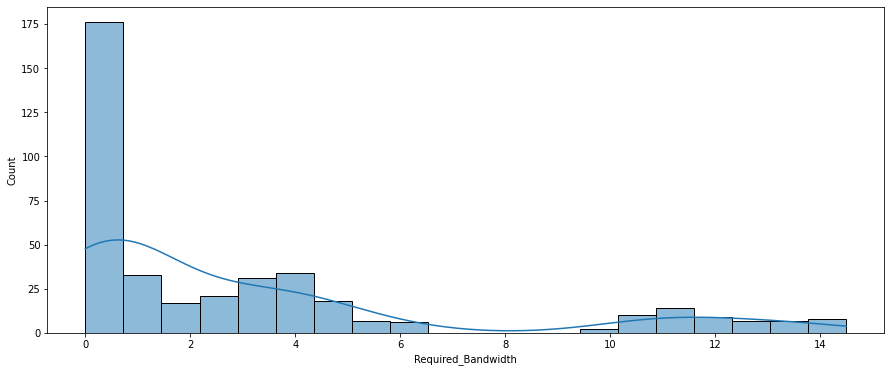

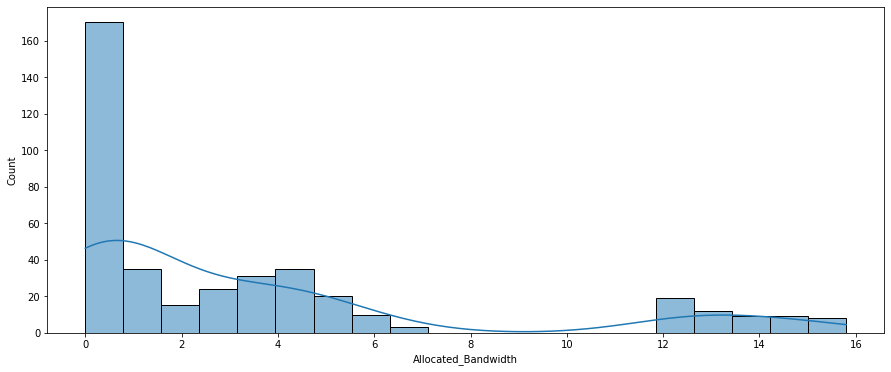

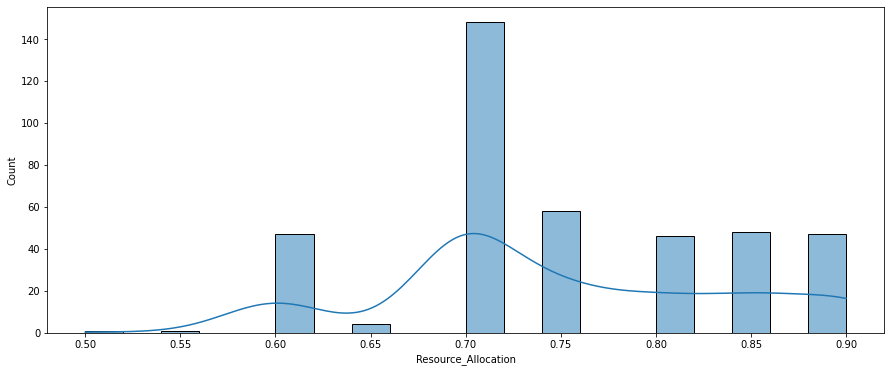

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

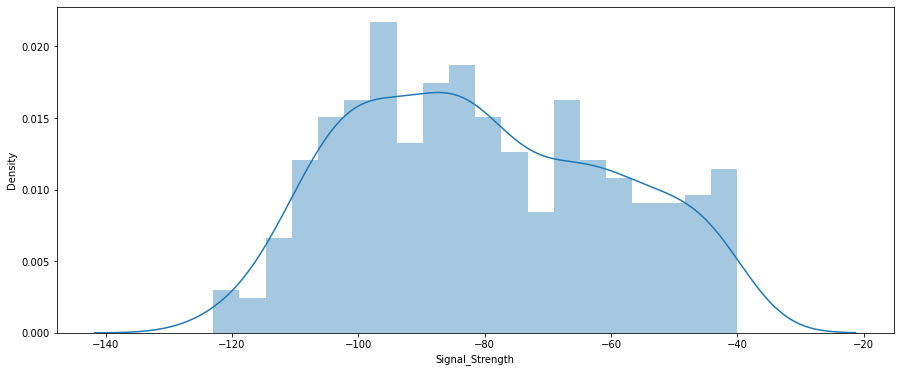

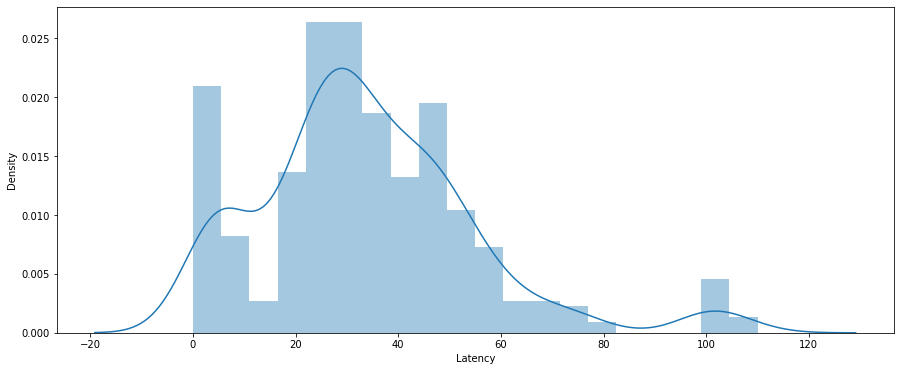

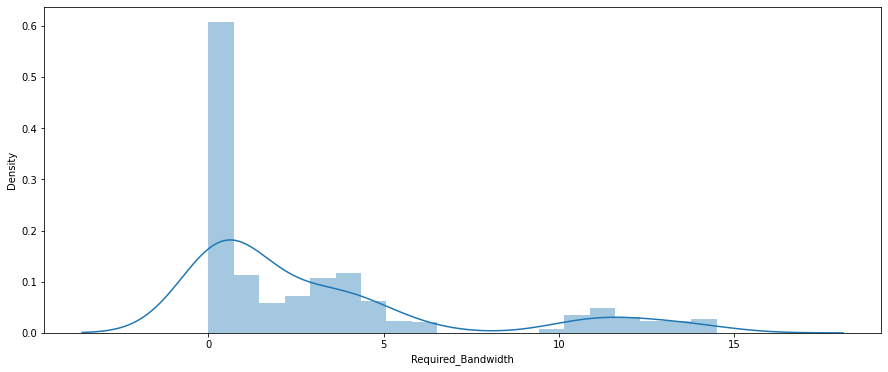

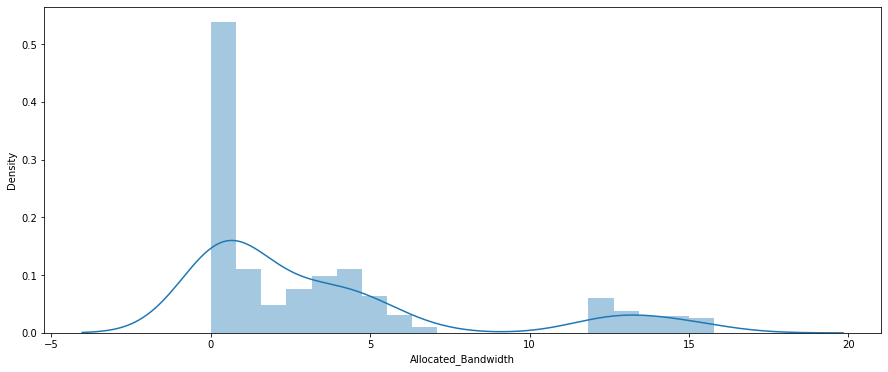

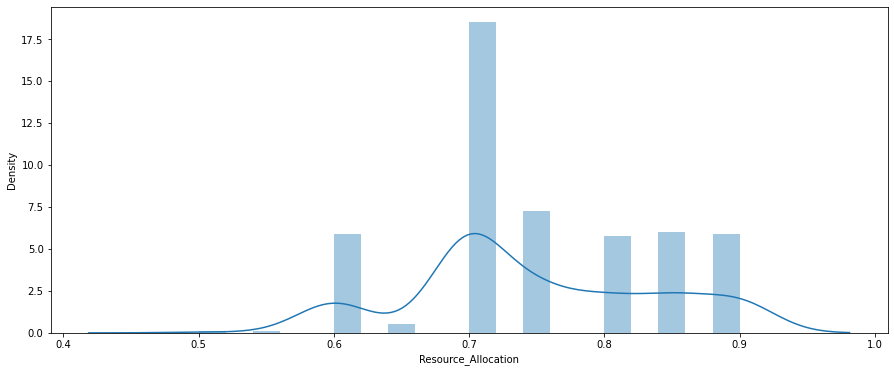

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

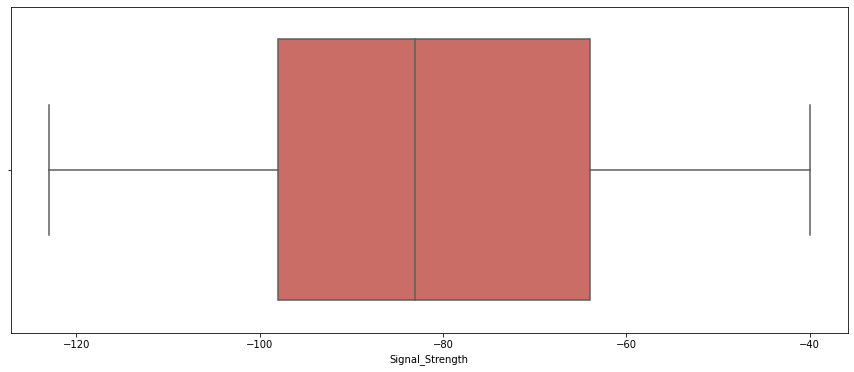

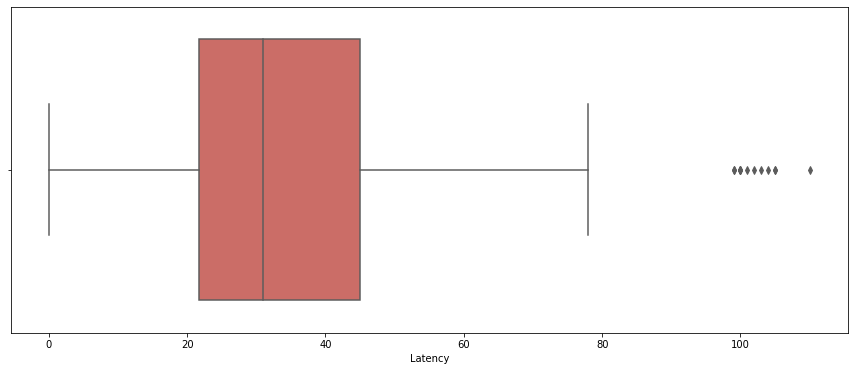

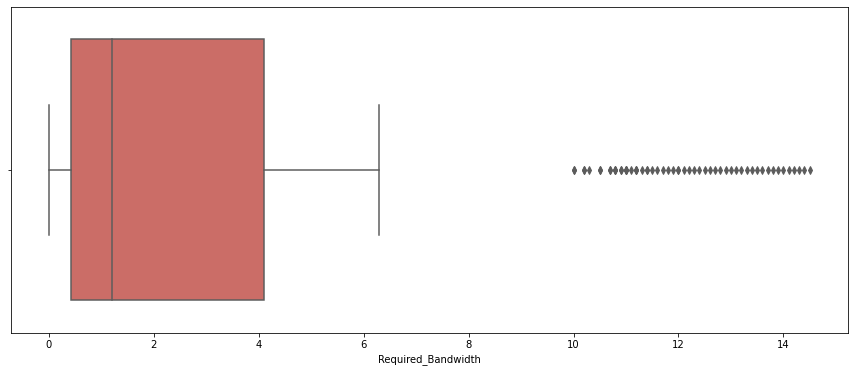

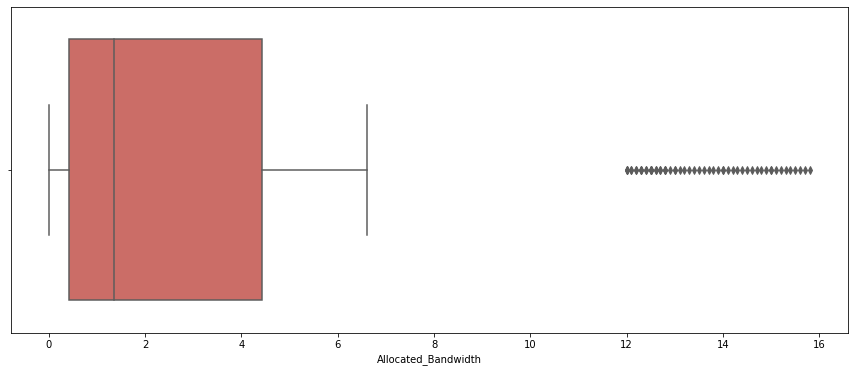

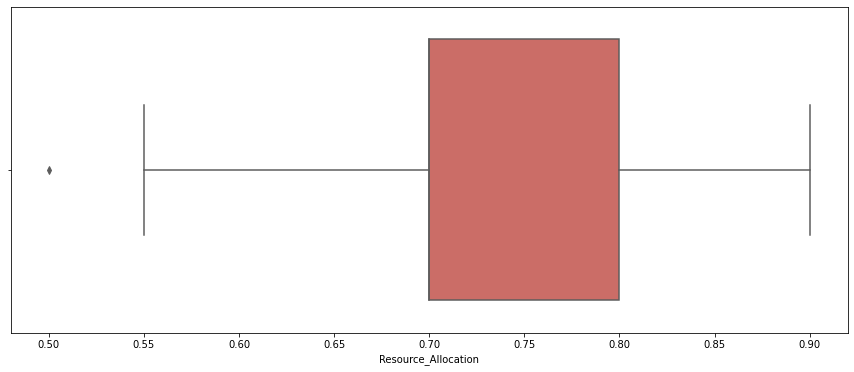

In [26]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

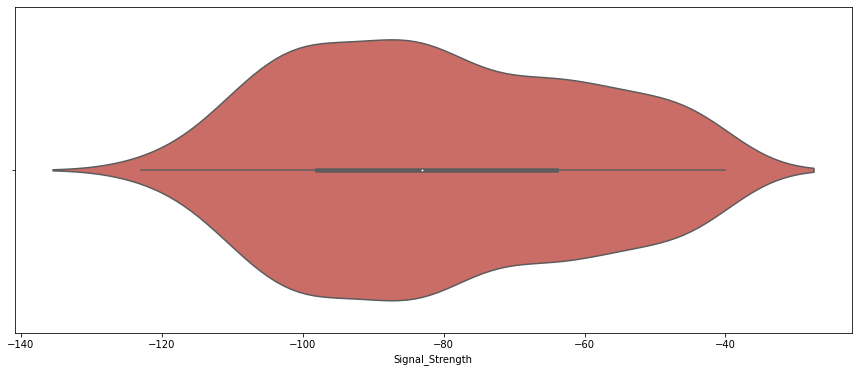

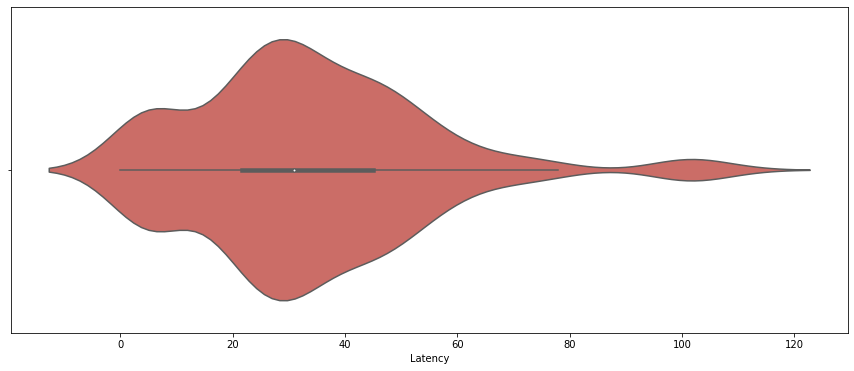

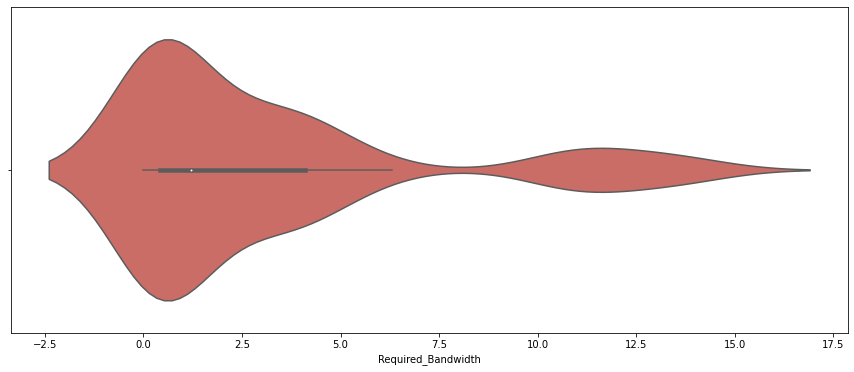

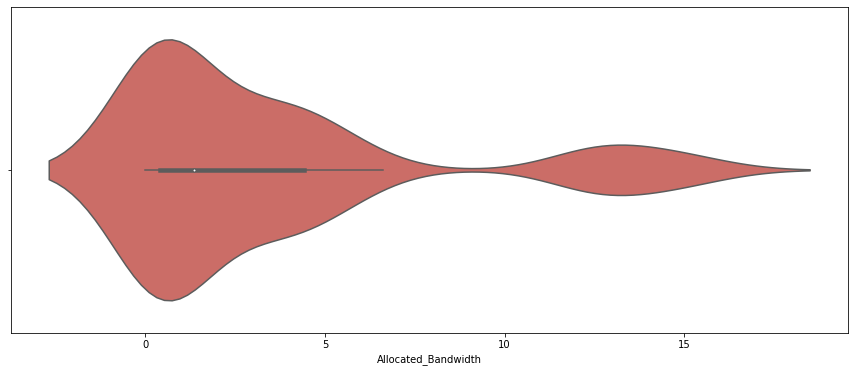

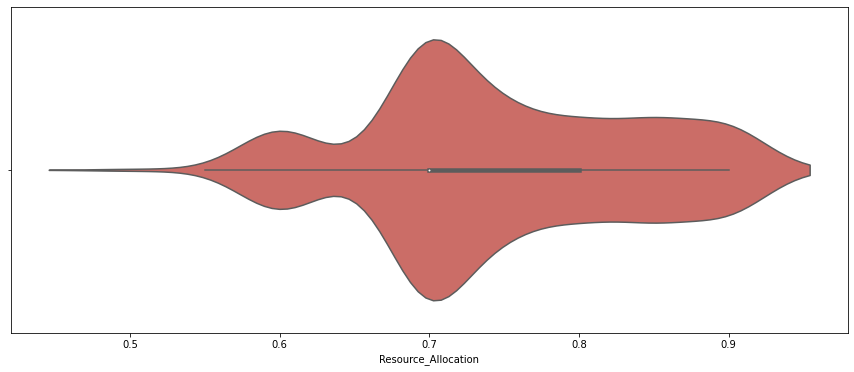

In [27]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

In [28]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count")
    fig.show()

In [29]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Box(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [30]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Violin(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

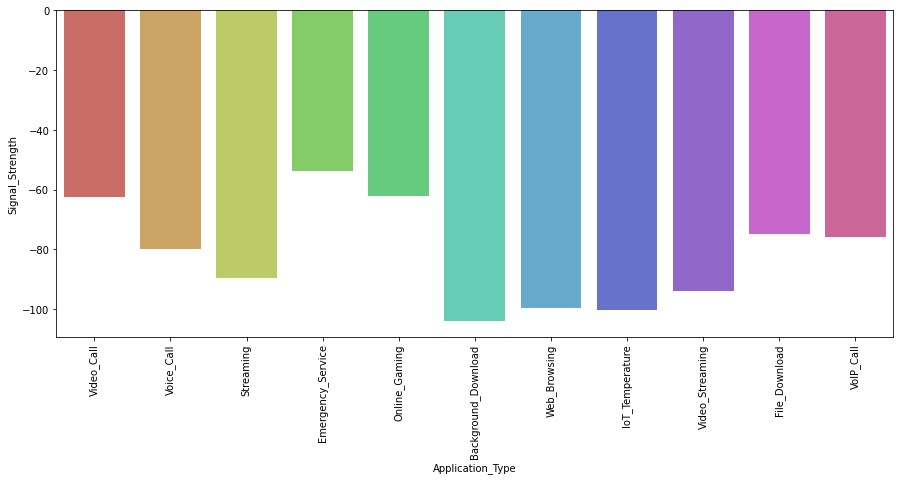

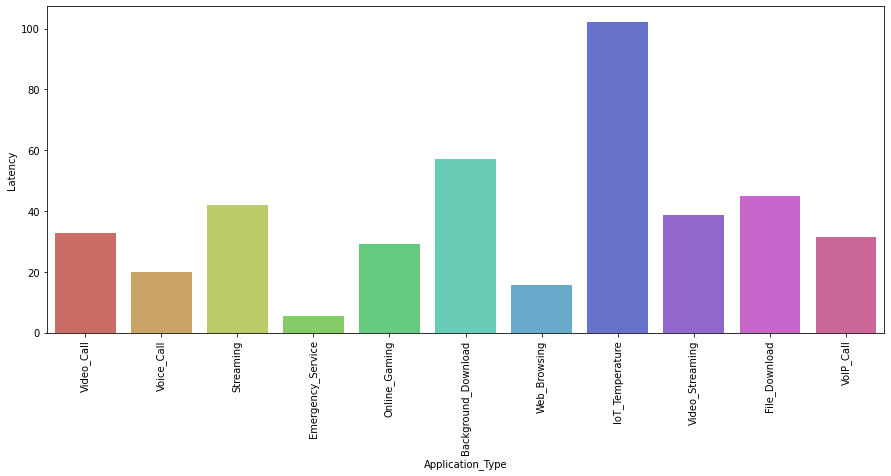

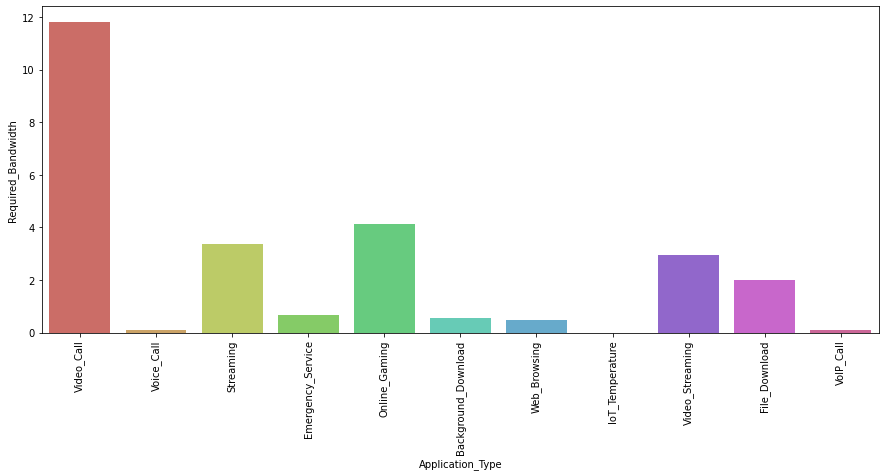

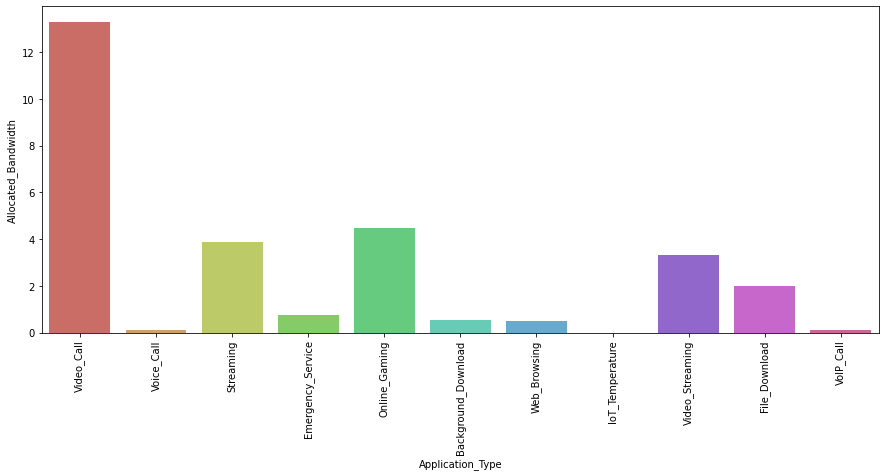

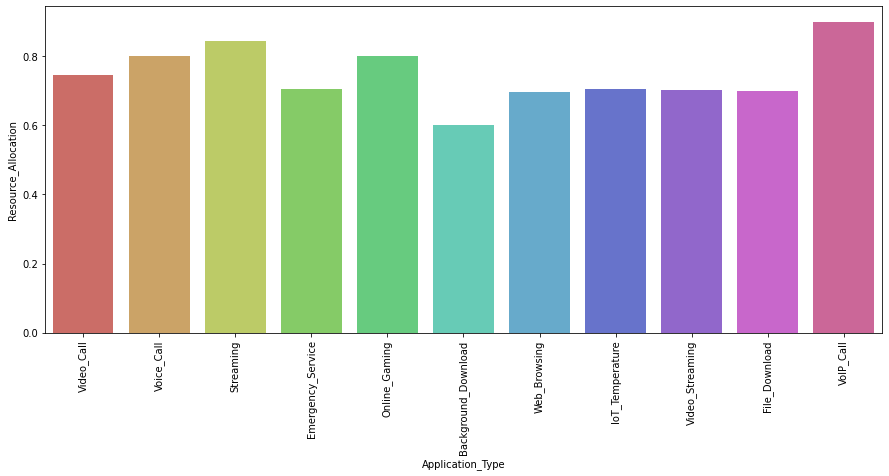

In [31]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.barplot(x = df['Application_Type'], y = df[i], data = df, ci = None, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [32]:
for i in numerical_columns:
    fig = px.bar(df, x='Application_Type', y=i, color='Application_Type', 
                 title=f'{i} by Application Type')
    fig.update_layout(xaxis_title='Application Type', yaxis_title=i)
    fig.show()

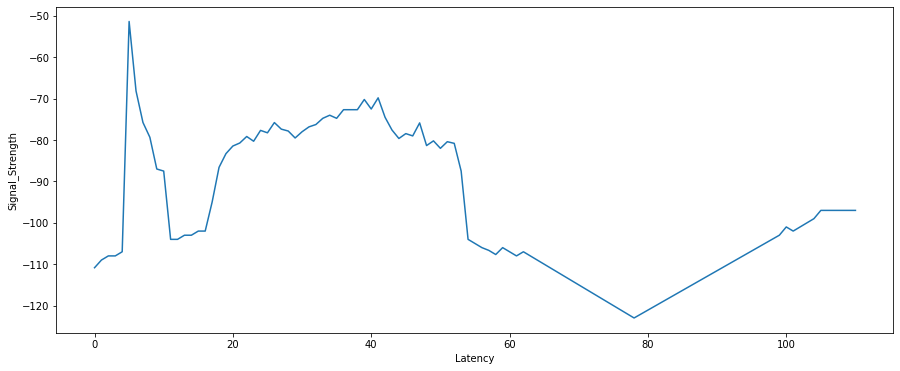

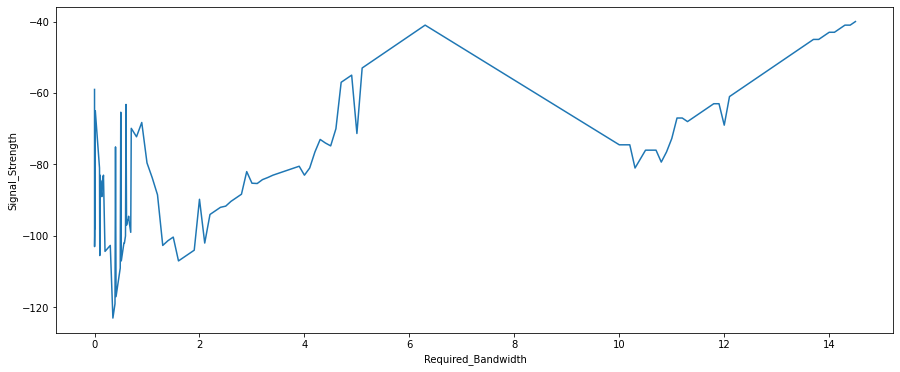

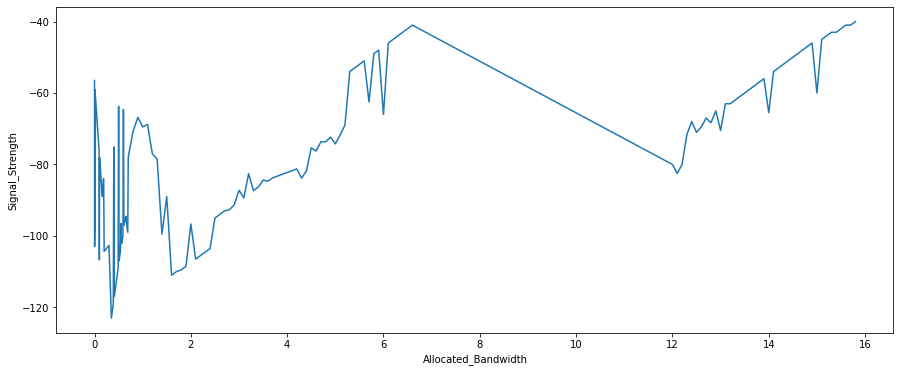

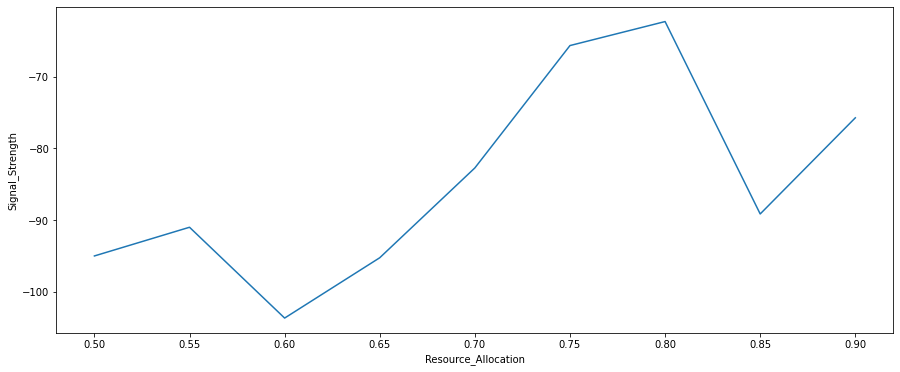

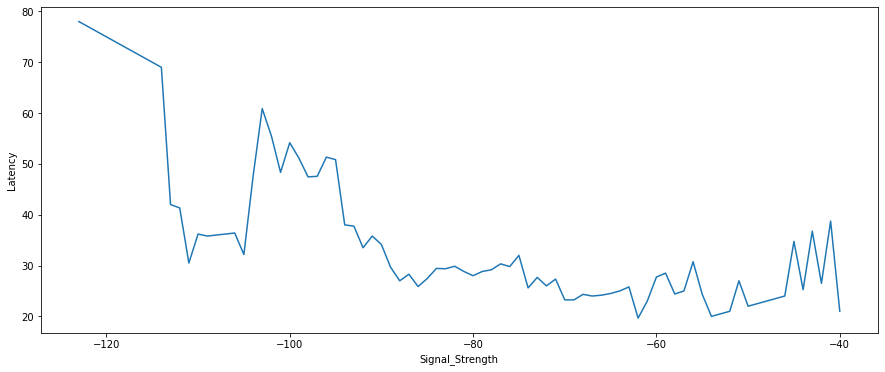

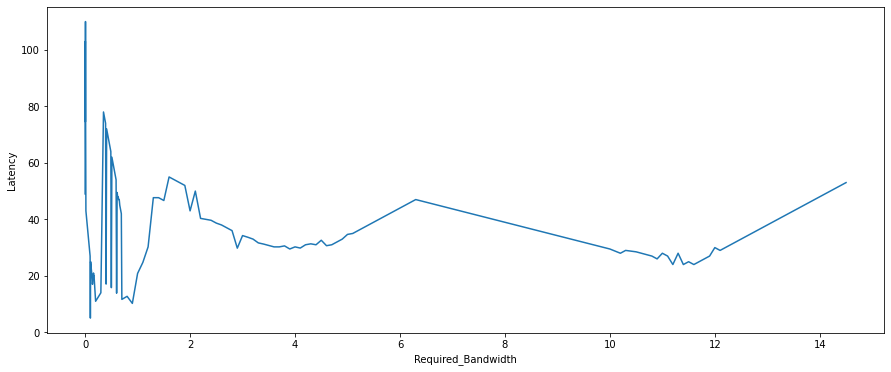

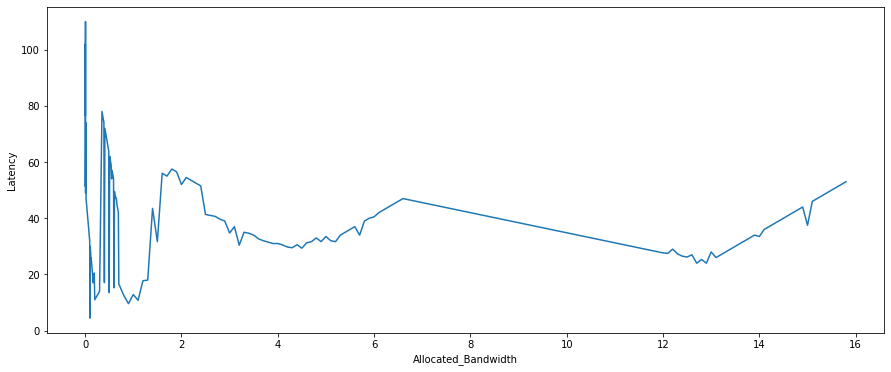

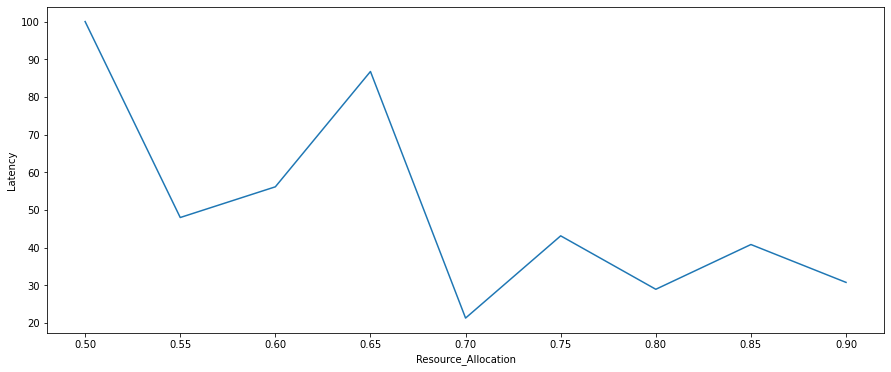

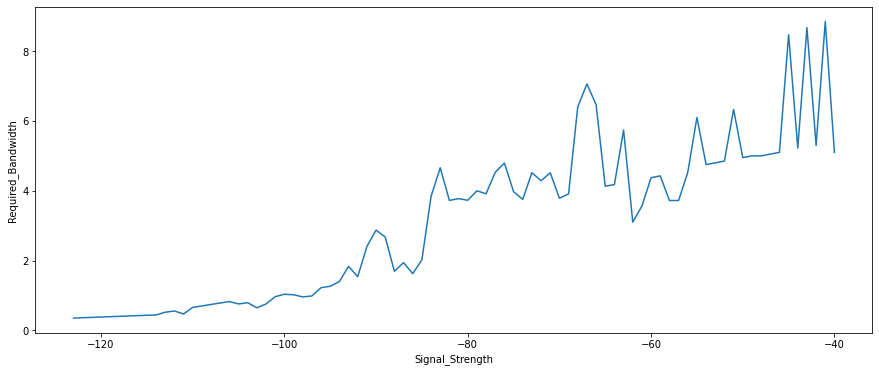

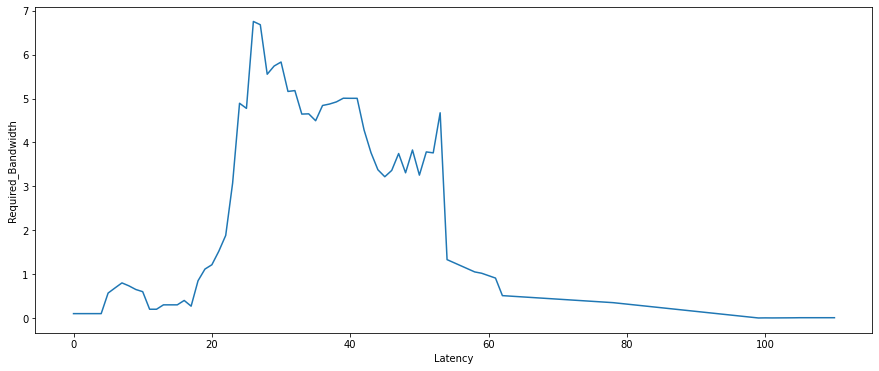

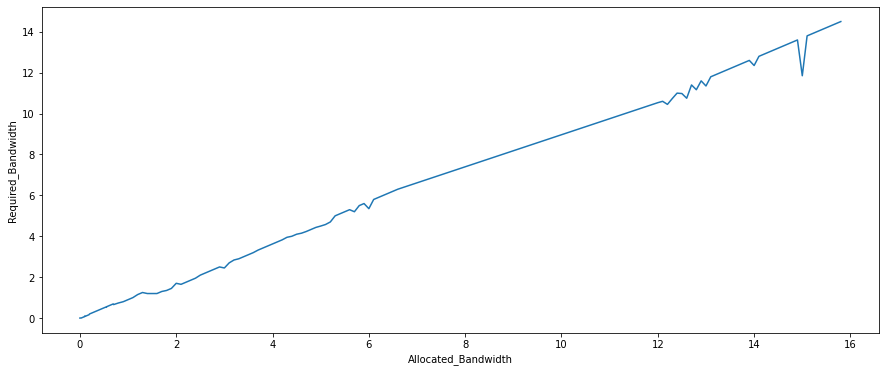

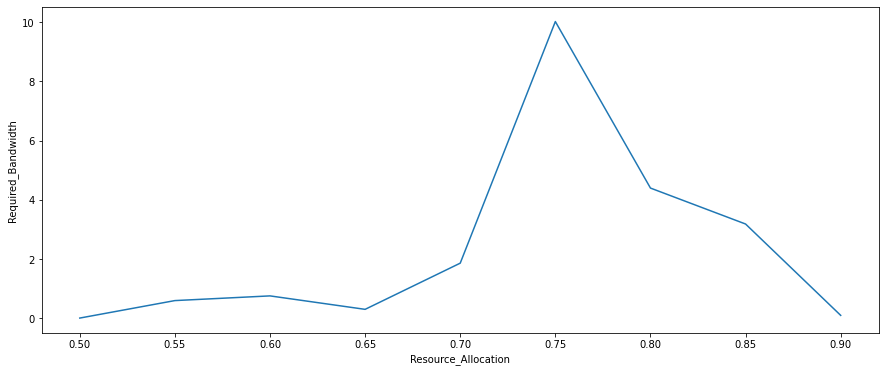

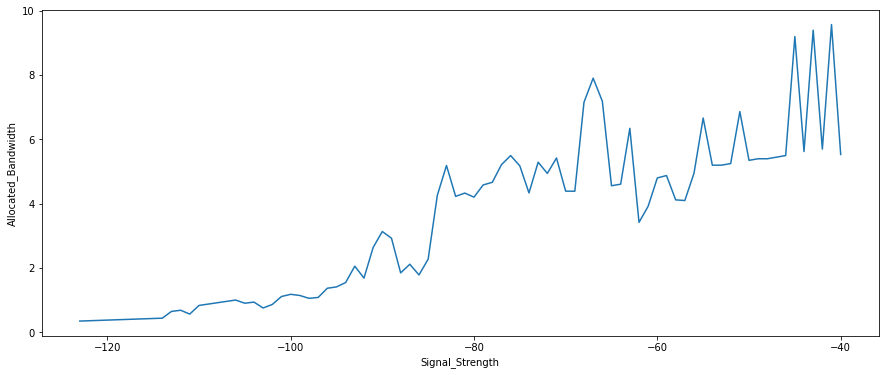

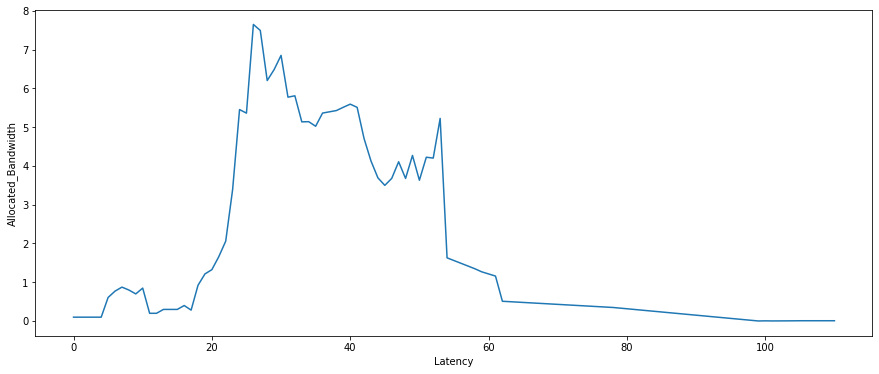

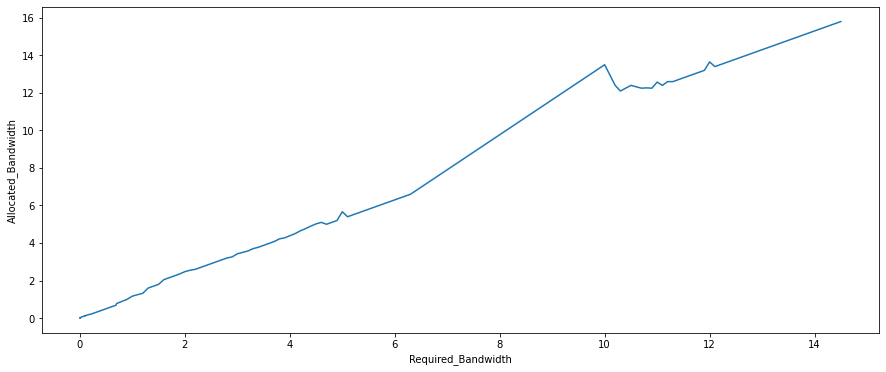

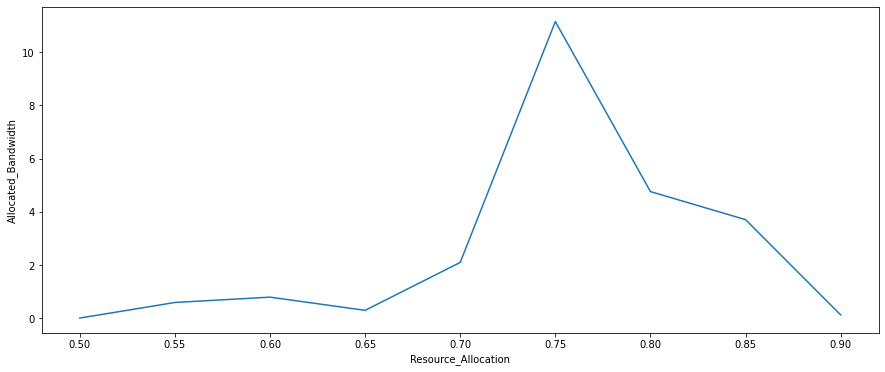

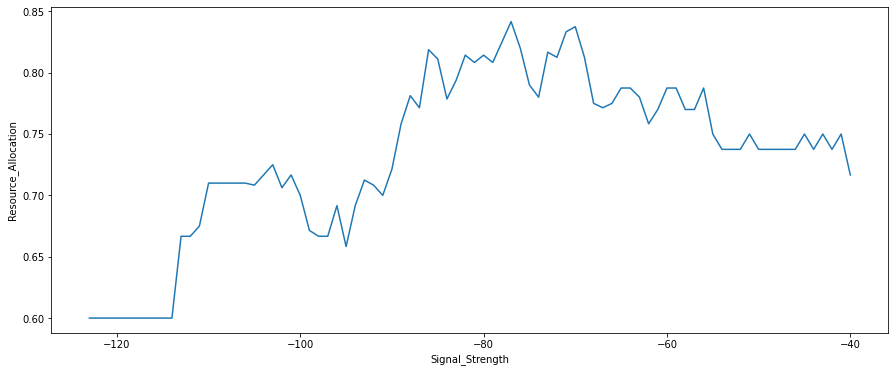

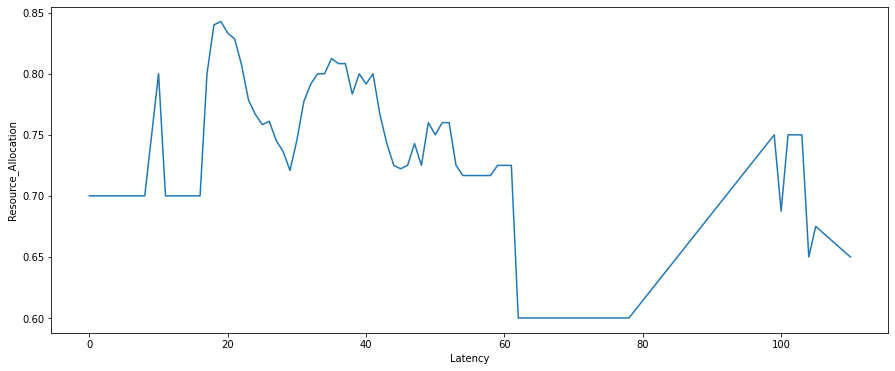

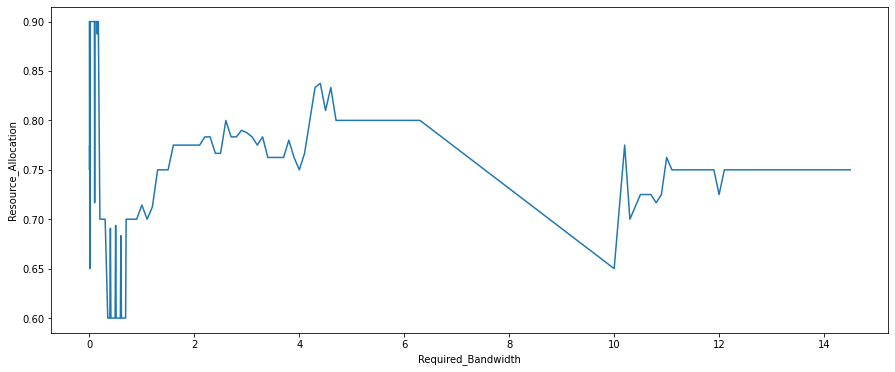

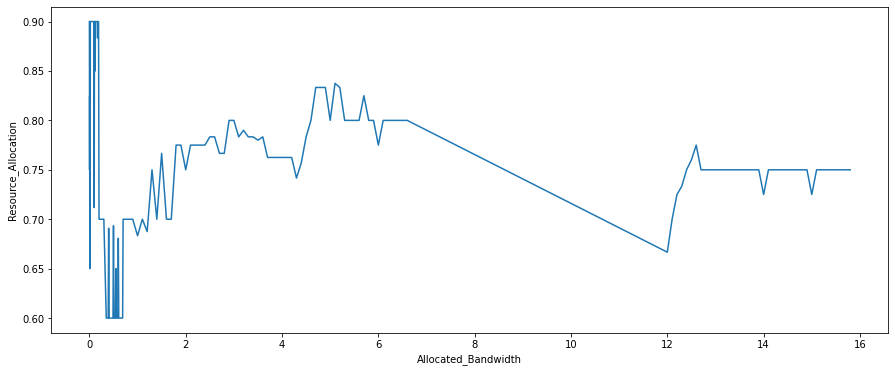

In [33]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x = df[j], y = df[i], data = df, ci = None, palette = 'hls')
            plt.show()

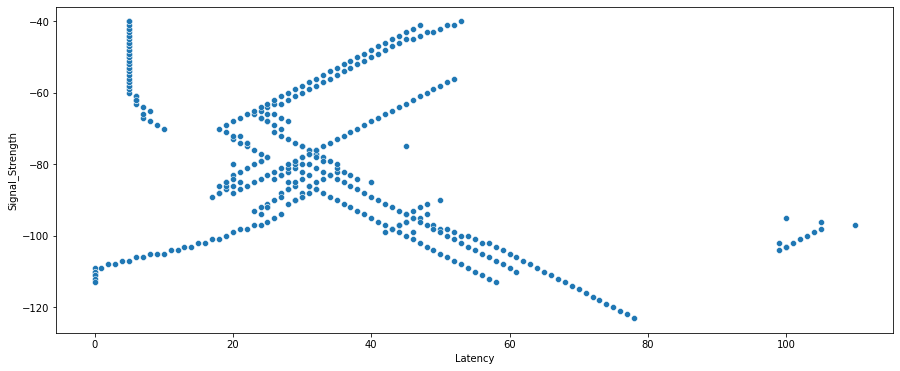

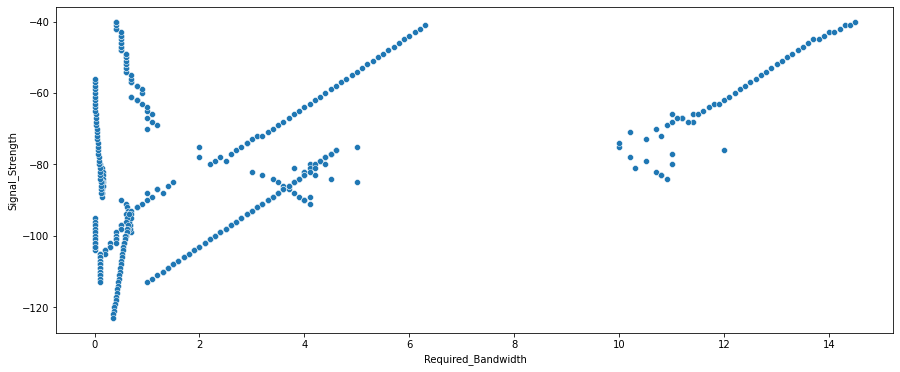

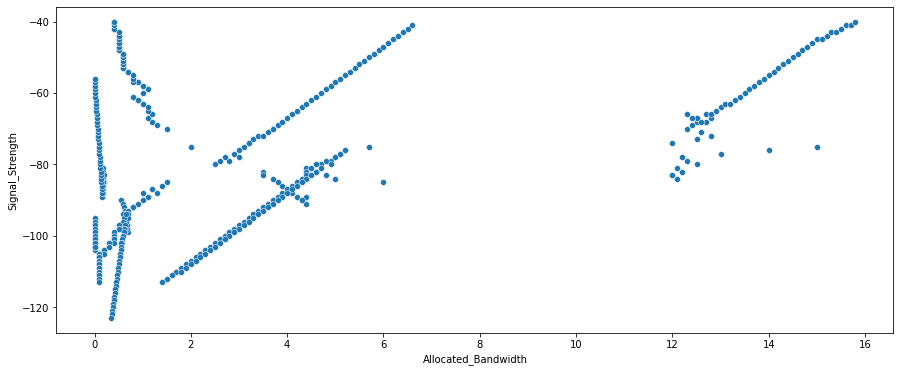

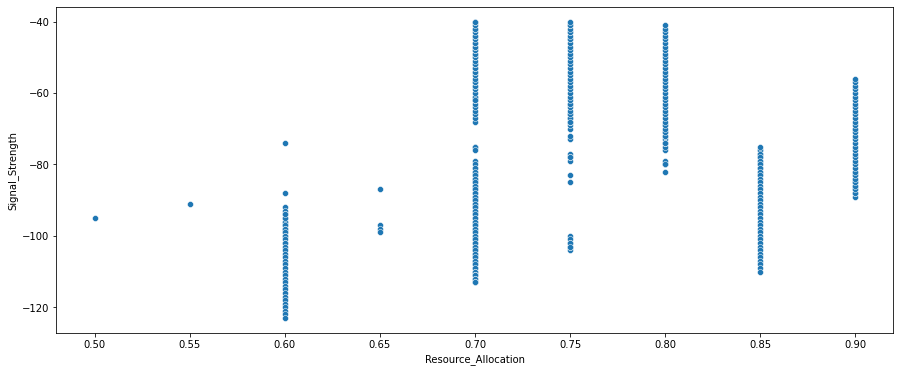

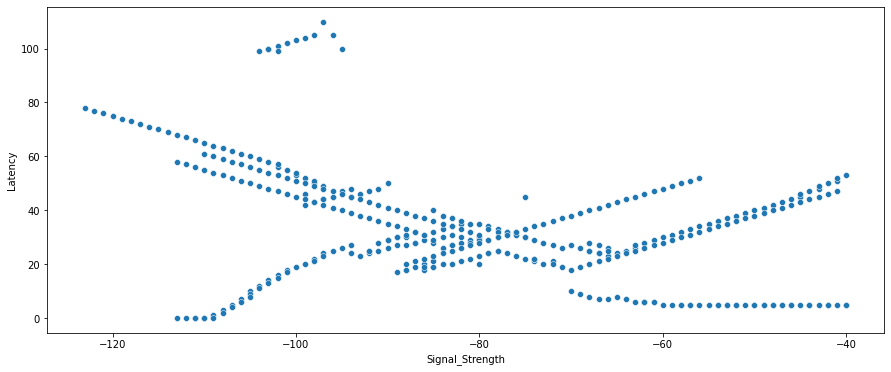

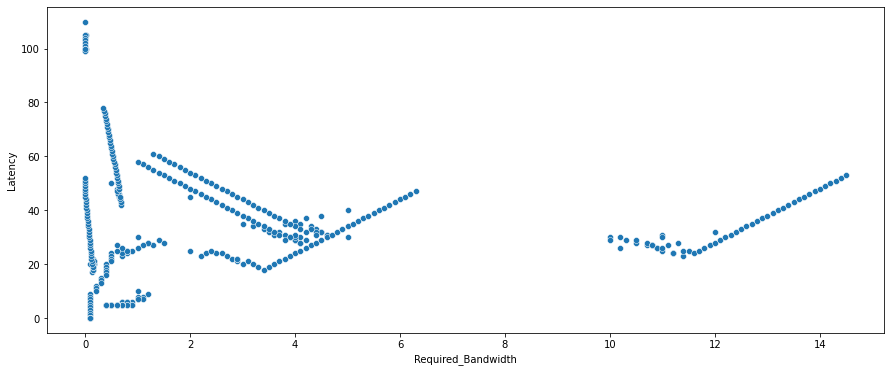

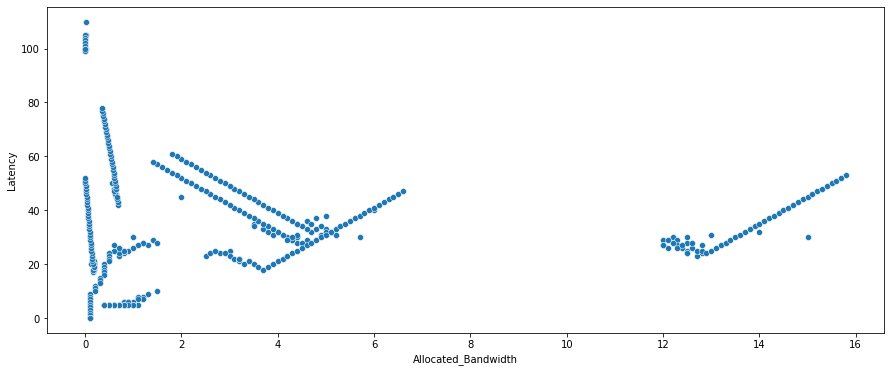

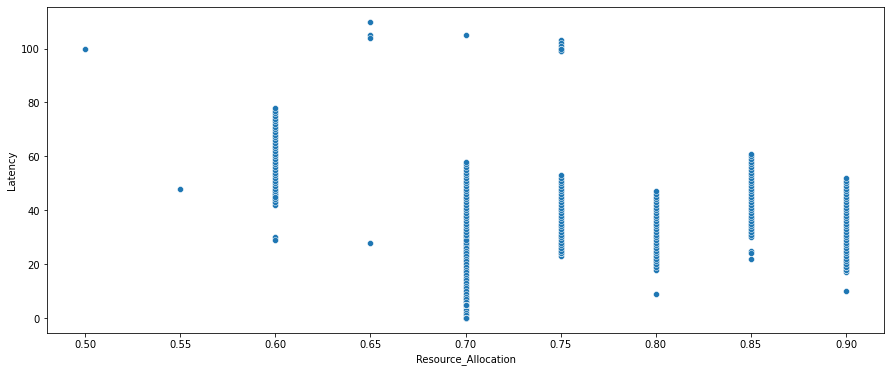

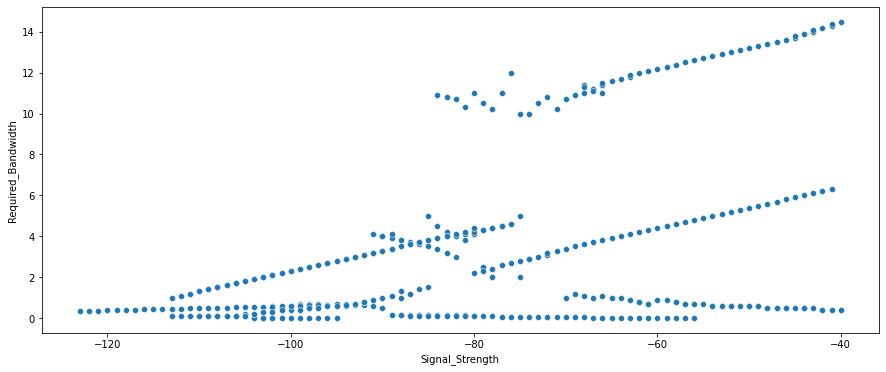

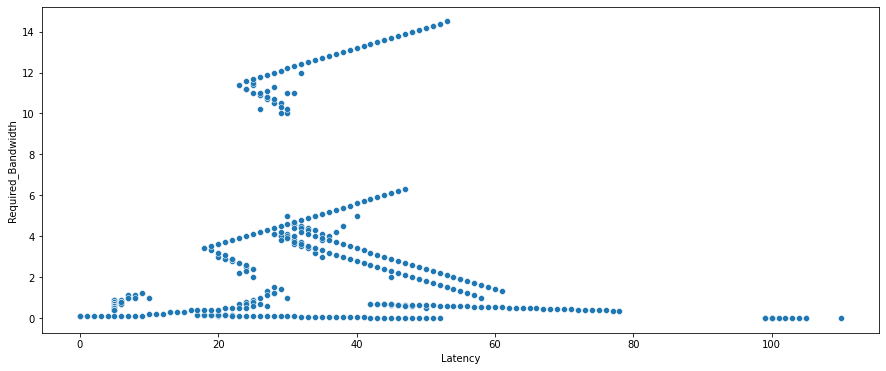

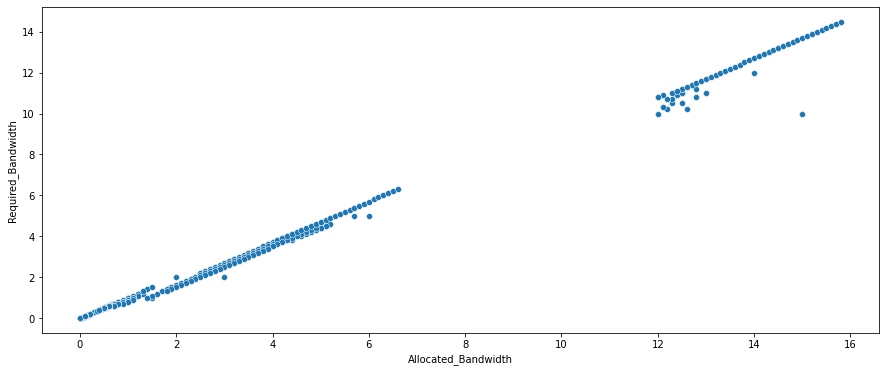

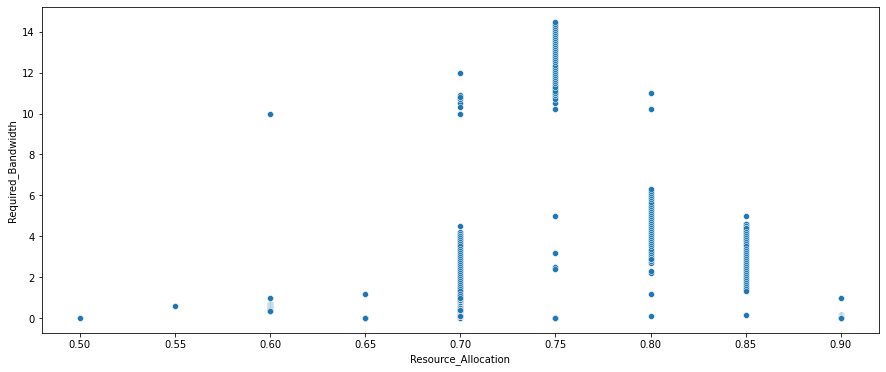

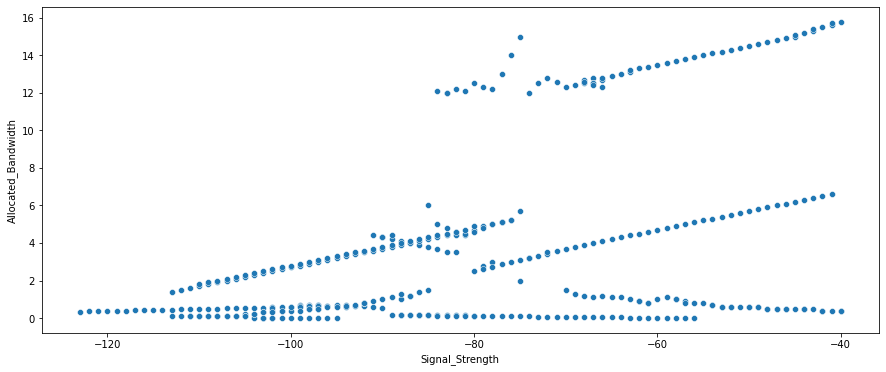

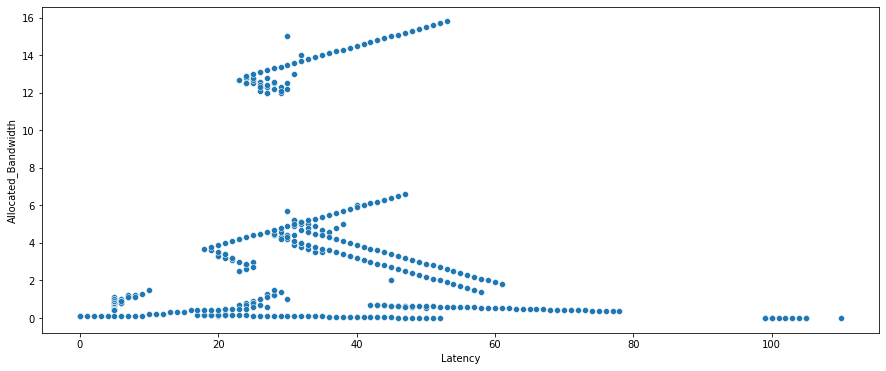

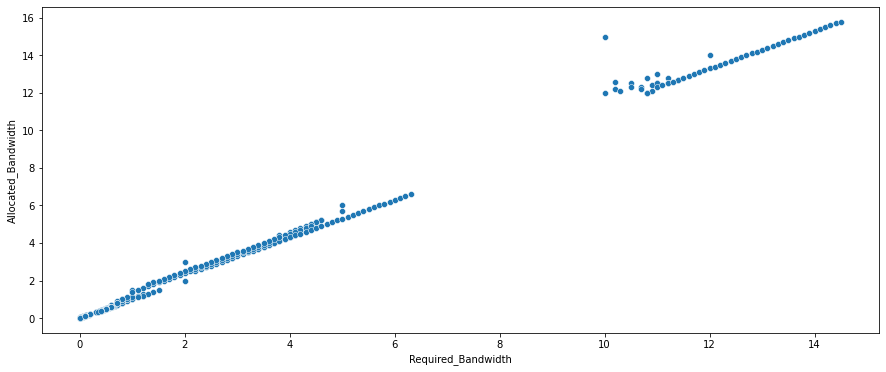

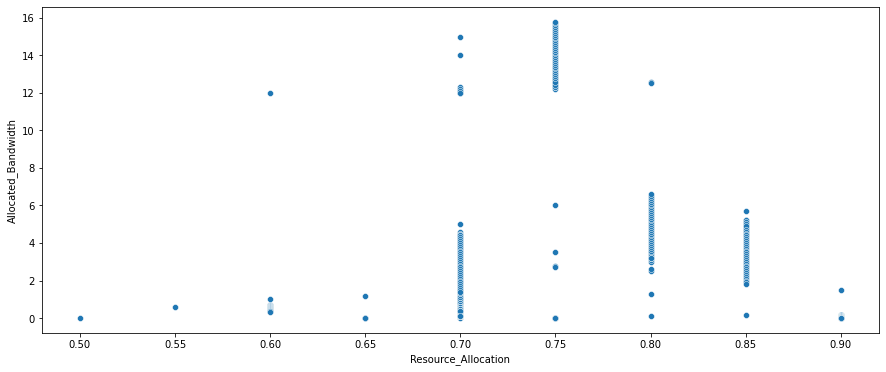

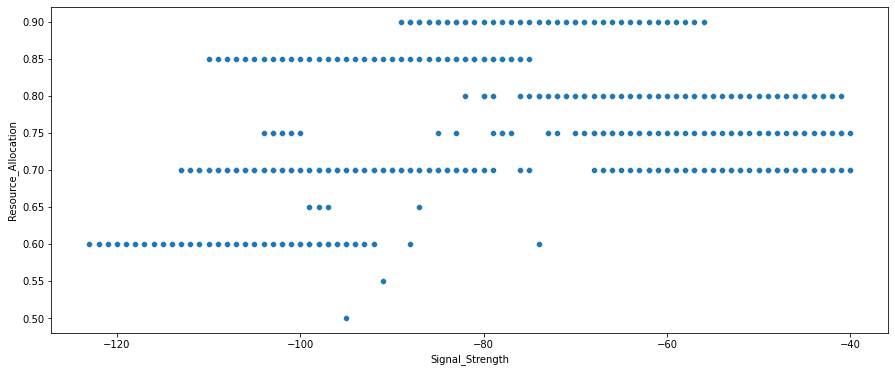

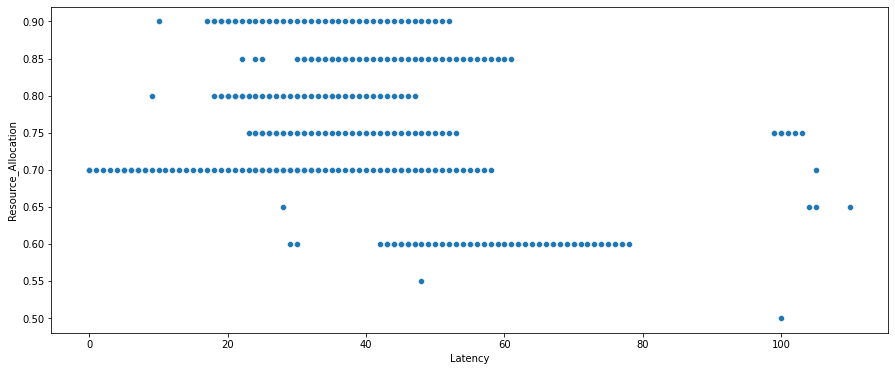

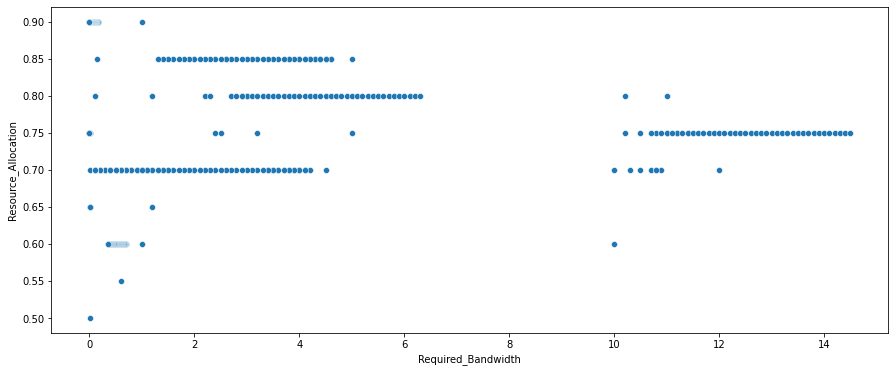

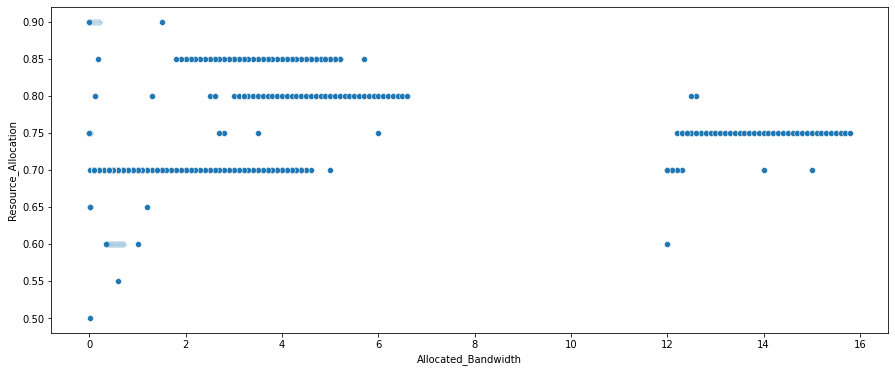

In [34]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, ci = None, palette = 'hls')
            plt.show()

In [35]:
for i in numerical_columns:
    grouped_df = df.groupby('Application_Type')[i].mean().reset_index()
    fig = px.bar(grouped_df, x='Application_Type', y=i, color='Application_Type', title=f'Mean {i} by Application Type')
    fig.update_layout(xaxis_title='Application Type', yaxis_title=f'Mean {i}')
    fig.show()

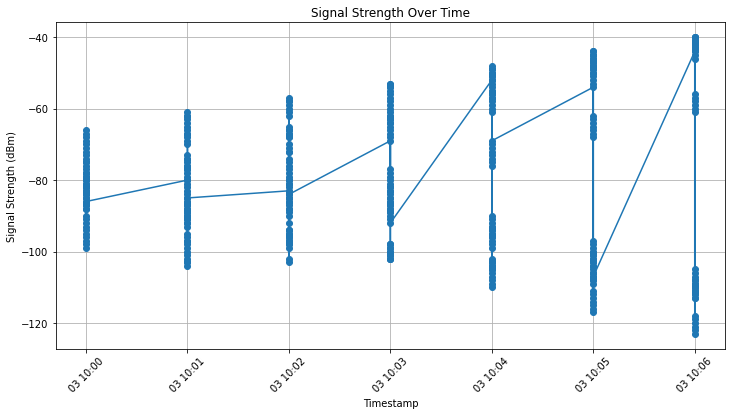

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Signal_Strength'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Signal Strength (dBm)')
plt.title('Signal Strength Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

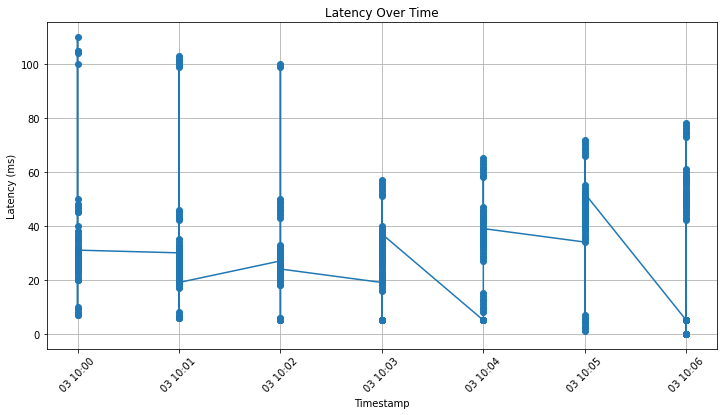

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Latency'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

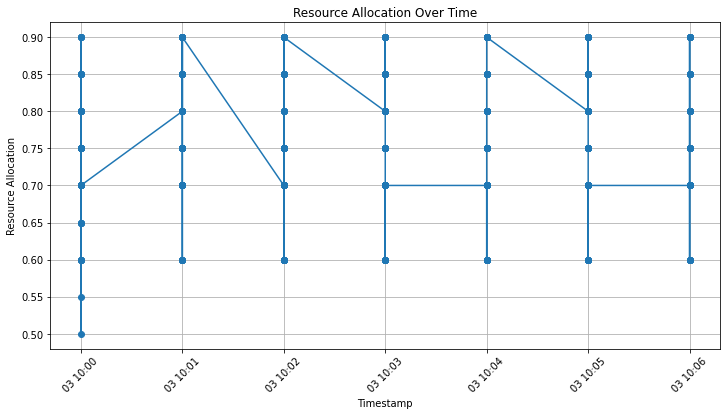

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Resource_Allocation'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Resource Allocation')
plt.title('Resource Allocation Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [39]:
fig_latency = px.line(df, x='Timestamp', y='Signal_Strength', title='Signal Strength Over Time')
fig_latency.show()

In [40]:
fig_latency = px.line(df, x='Timestamp', y='Latency', title='Latency Over Time')
fig_latency.show()

In [41]:
fig_allocation = px.line(df, x='Timestamp', y='Resource_Allocation', title='Resource Allocation Over Time')
fig_allocation.show()

In [42]:
correlation_matrix = df.corr()

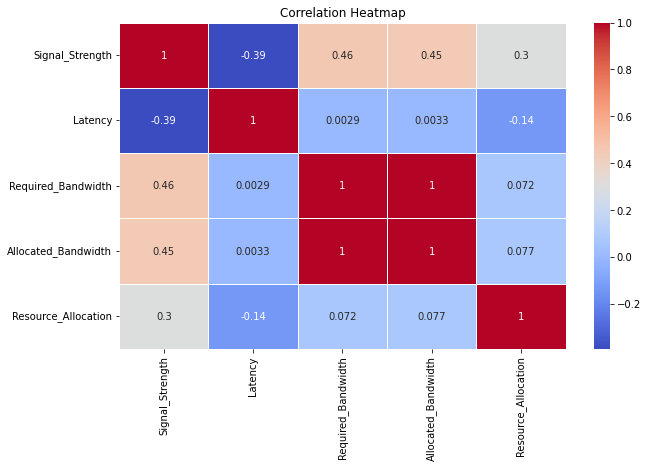

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
df['Efficiency_Ratio_Latency'] = df['Allocated_Bandwidth'] / df['Latency']
df['Resource_Performance'] = df['Resource_Allocation'] * df['Signal_Strength']

In [45]:
print(df[['Efficiency_Ratio_Latency', 'Resource_Performance']].head())

   Efficiency_Ratio_Latency  Resource_Performance
0                     0.500                -52.50
1                     0.006                -64.00
2                     0.150                -63.75
3                     0.150                -63.00
4                     0.120                -66.30


In [46]:
fig_efficiency = px.scatter(df, x='Efficiency_Ratio_Latency', y='Resource_Allocation', title='Efficiency vs. Resource Allocation')
fig_efficiency.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
X = df[['Signal_Strength', 'Required_Bandwidth']]
y = df['Resource_Allocation']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.007977063585505356
R-squared: 0.08959552499247914


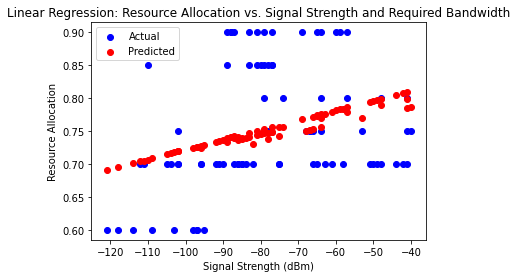

In [53]:
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred, color='red', label='Predicted')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Linear Regression: Resource Allocation vs. Signal Strength and Required Bandwidth')
plt.show()

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [55]:
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [56]:
y_pred_poly = polyreg.predict(X_test)

In [57]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression - R-squared: {r2_poly}')

Polynomial Regression - Mean Squared Error: 0.002299303304758281
Polynomial Regression - R-squared: 0.7375856421835318


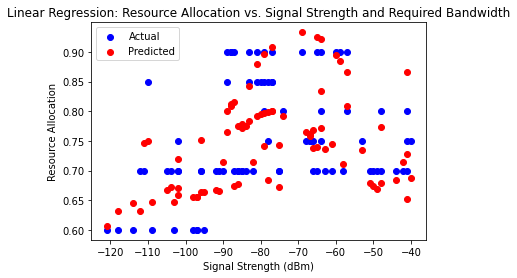

In [58]:
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred_poly, color='red', label='Predicted')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Linear Regression: Resource Allocation vs. Signal Strength and Required Bandwidth')
plt.show()

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Signal_Strength'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Signal_Strength'], y=y_pred_poly, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Signal Strength (dBm)', yaxis_title='Resource Allocation', title='Linear Regression: Actual vs. Predicted Resource Allocation')
fig.show()

In [61]:
df['Latency_Signal_Interaction'] = df['Latency'] * df['Signal_Strength']

In [62]:
X = df[['Latency', 'Latency_Signal_Interaction']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
mse_new_feature = mean_squared_error(y_test, y_pred)
r2_new_feature = r2_score(y_test, y_pred)

print(f'Mean Squared Error with New Feature: {mse_new_feature}')
print(f'R-squared with New Feature: {r2_new_feature}')

Mean Squared Error with New Feature: 0.006822902316122303
R-squared with New Feature: 0.22131737643114047


In [66]:
degree = 4
polyreg = PolynomialFeatures(degree)
X_poly_train = polyreg.fit_transform(X_train)
X_poly_test = polyreg.transform(X_test)

In [67]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [68]:
y_pred_poly = model.predict(X_poly_test)

In [69]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error with Polynomial Feature: {mse_poly}')
print(f'R-squared with Polynomial Feature: {r2_poly}')

Mean Squared Error with Polynomial Feature: 0.004833682728885595
R-squared with Polynomial Feature: 0.4483425711761795


# Thanks !!!